### Heart Disease prediction using Machine Learning

This notebook will introduce Machine Learning & data science concepts by exploring the problem of heart disease clssification.
I tried to create this machine learning model as much possible end to end & descriptive.

This is example of <b>Single-Class Classification</b>, where it involves to decide whether a sample is part of one class or another.

<b>Logistic Regression:</b>
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

This is 6 steps m Machine Learning modelling framework -
* STEP-1: Identify the Problem
* STEP-2: Data
* STEP-3: Evaluation
* STEP-4: Features
* STEP-5: Modelling
* STEP-6: Experiments

Specifically I will look at the following topic -
 - <b>Exploratory Data Analysis (EDA)</b> - It is an approach of analyzing data sets to summarize their main characteristics.
 - <b>Model Training</b> - Create Model to learn to predict a target variable based on other variables.
 - <b>Model Evaluation</b> - Evaluating a models predictions using problem-specific evaluation metrics
 - <b>Model Comparison</b> - Comparing several different models to find the best one.
 - <b>Model fine-tuning</b> - Once we have found good model, then will try to improve it.
 - <b>Feature importance</b> - Understand the ket features which is most important for predicting heart disease
 - <b>Cross Validation</b> -To prove it good model have to ensure it will work fine with unseen data as well.
 - <b>Reporting</b> - Create clean & clear reporting for demo

<h1>STEP-1: Identify the Problem</h1>

In our case, here I will exploring <b> Binary Classification </b>.
This is because, we are going to be using a number of different features about a person to predict whether they have heart disease or not. Here I will provide few clinical parameters about a person & predict whether this person have heart disease or not.

<h1> STEP-2: Data </h1>

Here I am using the data from <b>Kaggle</b>

Data Source References - 
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

Though I did some modification on the data.

Attributes and features also referred to as independent variables and target variable can be referred to as a dependent variable. I use the independent variables to predict our dependent variable.

<h1>STEP-3: Evaluation</h1>

Evaluation metric defined the accuracy level of the prediction model. So, My target to reach 90%-95% of accuracy. but this is a tentative target however, due to the nature of experimentation the evaluation metric may change over time.

<h1>STEP-4: Features</h1>

Features are different parts of the data. During this steps, will findout what I can do with different attributes of data.

Most common way to this, is to create Data Dictionary.

Features are different parts of the data. During this steps, will findout what I can do with different attributes of data.

Most common way to this, is to create Data Dictionary.

<b>Heart Disease Data Dictionary:</b>

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

<h2>Preparing the tools</h2>

At the start of the project I will export all the required libraries in a big chunk just for clean coding.

Here I will going to use below -
* PANDAS - For Data Analysis
* NUMPY - For Numerical Operation
* MATPLOTLIB/SEABORN - For plotting & Data Visualization
* SCIKIT-LEARN - For Machine learning modelling & Evaluation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

<h2>Load Data</h2>

For this project Data stored as .csv format.

Pandas has built-in function to read .csv file is called read_csv()

In [2]:
df = pd.read_csv("data.csv")
df.shape

(4238, 14)

<h2> Data Exploration - Exploratory Data Analysis (EDA) 

Data is already imported so, now I will explore the data.Compare different columns & Compare with Target data. Also need to ensure to avoid Overfitting & Underfitting issue.

In [3]:
#Let's take a look top 5 rows of data frame

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,46,0,2,130,250,0,1,187,0,3.5,0,0,2,0
2,48,1,1,130,204,0,0,172,0,1.4,2,0,2,0
3,61,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,46,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [4]:
#Let's take a look top 15 rows of data frame

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,46,0,2,130,250,0,1,187,0,3.5,0,0,2,0
2,48,1,1,130,204,0,0,172,0,1.4,2,0,2,0
3,61,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,46,0,0,120,354,0,1,163,1,0.6,2,0,2,0
5,43,0,0,140,192,0,1,148,0,0.4,1,0,1,0
6,63,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,45,0,1,120,263,0,1,173,0,0.0,2,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
9,43,1,2,150,168,0,1,174,0,1.6,2,0,2,0


value_counts() - Allows you to show how many time each of the values of Categorical column appear.

In [5]:
#Let's check how many Positive(1) & Negative(0) samples we have in our dataframe.

df.target.value_counts()

0    3594
1     644
Name: target, dtype: int64

Lets take a look Normalize Value count

In [6]:
#Normalize Value count

df.target.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: target, dtype: float64

Now I will create a plot the target column value counts by calling plot()

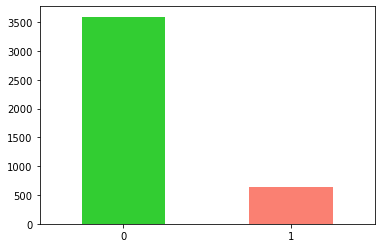

In [7]:
# Plot the value counts with a bar graph

df.target.value_counts().plot(kind="bar",color=["limegreen","salmon"]);
plt.xticks(rotation=0);

df.info() - Shows a quick insight to the number of missing values

In our case there have no missing value.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4238 non-null   int64  
 1   sex       4238 non-null   int64  
 2   cp        4238 non-null   int64  
 3   trestbps  4238 non-null   int64  
 4   chol      4238 non-null   int64  
 5   fbs       4238 non-null   int64  
 6   restecg   4238 non-null   int64  
 7   thalach   4238 non-null   int64  
 8   exang     4238 non-null   int64  
 9   oldpeak   4238 non-null   float64
 10  slope     4238 non-null   int64  
 11  ca        4238 non-null   int64  
 12  thal      4238 non-null   int64  
 13  target    4238 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 463.7 KB


Another way to get some quick insights of the dataframe to use df.describe() , which shows a range of different metrics about the numerical column such as mean,max,standard deviation etc.

Are there any missing value?

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.429212,0.966966,131.626711,246.302029,0.148419,0.527843,149.655498,0.326805,1.039217,1.399717,0.729118,2.313119,0.151958
std,8.572160,0.495022,1.030268,17.515289,51.737941,0.355557,0.525088,22.869575,0.469101,1.159159,0.615449,1.021255,0.611334,0.359023
min,32.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,49.000000,0.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,56.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,0.000000
max,70.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h3> Heart Disease frequency according to Gender

To comapre two columns alawys use function - pd.crosstab(Column_1, Column_2)

This type of comparison is useful when we want to start gaining an intution about how idependent variables interact with your dependent variable. SO, here we compare Sex column.

Remember, From our Data Dictionary, 1 = Heart Disease Present, 0 = No Heart Disease and Sex, 1 = Male, 0 = Female

In [11]:
df.sex.value_counts()

0    2419
1    1819
Name: sex, dtype: int64

<b>There are 2419 Female & 1819 Male in our case data

In [12]:
# Now Compare target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,2118,1476
1,301,343


<b>Now Making Crosstab Visual

You can use the plot() function and passing it a few parameters such as, kind(the type of plot),figsize(length,width)(how big want to show), and colour = [colour_1,colour_2]

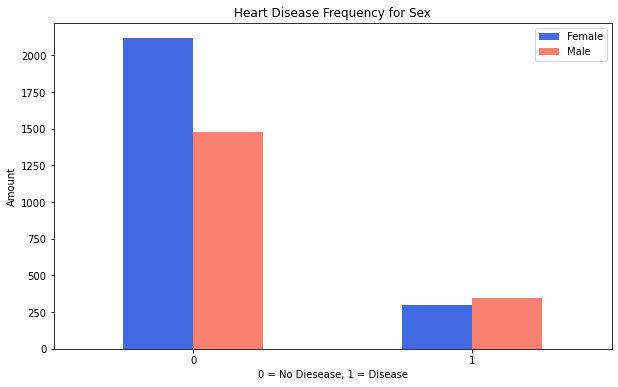

In [13]:
# Create a plot of crosstab wrt sex

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["royalblue", "salmon"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

<h3>Age vs. Max Heart Rate for Heart Disease

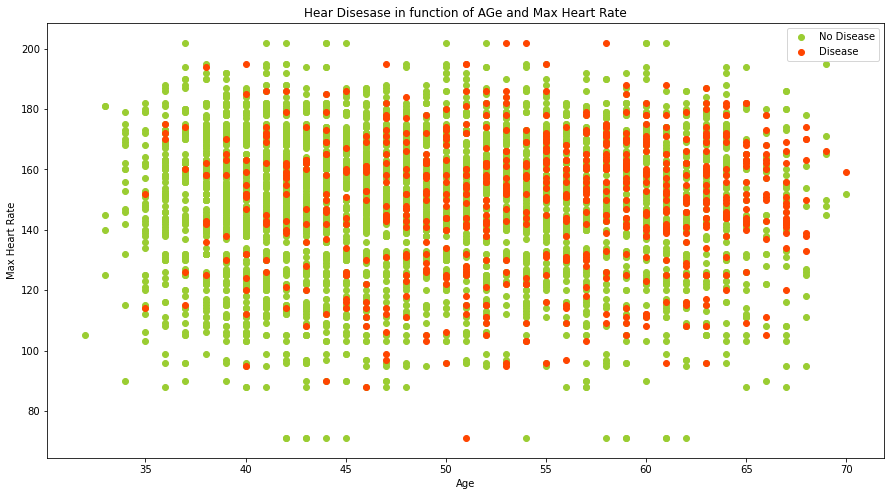

In [14]:
#Create another figure, this time I use scatter plot
plt.figure(figsize=(15,8))

#scatter with Negative example
plt.scatter (df.age[df.target==0], df.thalach[df.target==0], color = "yellowgreen")

#scatter with positive example
plt.scatter (df.age[df.target==1], df.thalach[df.target==1], color = "orangered")


plt.title ("Hear Disesase in function of AGe and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Disease" , "Disease"]);

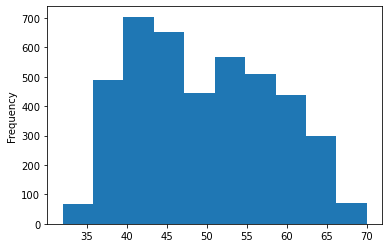

In [15]:
# Check the distribution of the age column with a histogram

df.age.plot.hist();

<h2>Analyze Fasting Blood Sugar Vs Heart Disease

In [16]:
df.fbs.value_counts()

0    3609
1     629
Name: fbs, dtype: int64

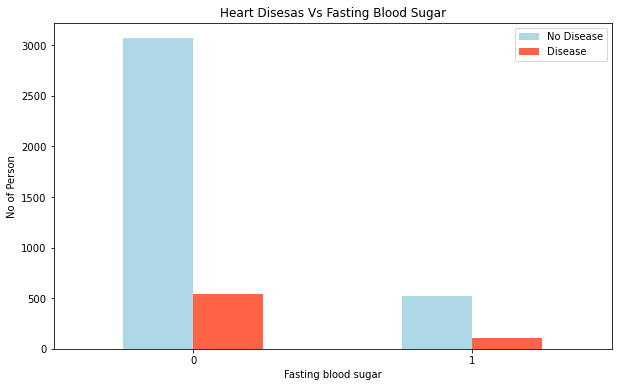

In [17]:
# Visualize fasting blood sugar patients with Heart Rate via Bar Graph

pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(10,6),color=["lightblue","tomato"])

plt.title("Heart Disesas Vs Fasting Blood Sugar")
plt.xlabel("Fasting blood sugar")
plt.ylabel("No of Person")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,46,0,2,130,250,0,1,187,0,3.5,0,0,2,0
2,48,1,1,130,204,0,0,172,0,1.4,2,0,2,0
3,61,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,46,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [19]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.028979,0.012397,0.004147,0.015440,0.004264,-0.024724,-0.010470,0.006095,0.034688,-0.015519,-0.010608,0.004223,0.225256
sex,-0.028979,1.000000,-0.014767,0.005281,0.003646,-0.002647,0.015302,0.009520,-0.014695,-0.019716,0.030922,-0.001057,0.008919,0.088428
cp,0.012397,-0.014767,1.000000,0.048363,-0.077892,0.095212,0.044455,0.296037,-0.394214,-0.148994,0.119840,-0.180556,-0.161942,-0.008120
trestbps,0.004147,0.005281,0.048363,1.000000,0.123512,0.177165,-0.114067,-0.046904,0.067590,0.193061,-0.121637,0.101036,0.062408,0.023022
chol,0.015440,0.003646,-0.077892,0.123512,1.000000,0.013690,-0.150640,-0.010728,0.067709,0.054538,-0.004519,0.071093,0.099671,0.026282
fbs,0.004264,-0.002647,0.095212,0.177165,0.013690,1.000000,-0.084715,-0.008484,0.026093,0.004543,-0.059775,0.137396,-0.032522,0.015564
restecg,-0.024724,0.015302,0.044455,-0.114067,-0.150640,-0.084715,1.000000,0.044981,-0.070965,-0.059532,0.093360,-0.072196,-0.012829,-0.039976
thalach,-0.010470,0.009520,0.296037,-0.046904,-0.010728,-0.008484,0.044981,1.000000,-0.378656,-0.344077,0.386806,-0.213328,-0.095697,0.000600
exang,0.006095,-0.014695,-0.394214,0.067590,0.067709,0.026093,-0.070965,-0.378656,1.000000,0.288675,-0.258007,0.115858,0.206843,0.003556
oldpeak,0.034688,-0.019716,-0.148994,0.193061,0.054538,0.004543,-0.059532,-0.344077,0.288675,1.000000,-0.577775,0.222344,0.209747,0.019648


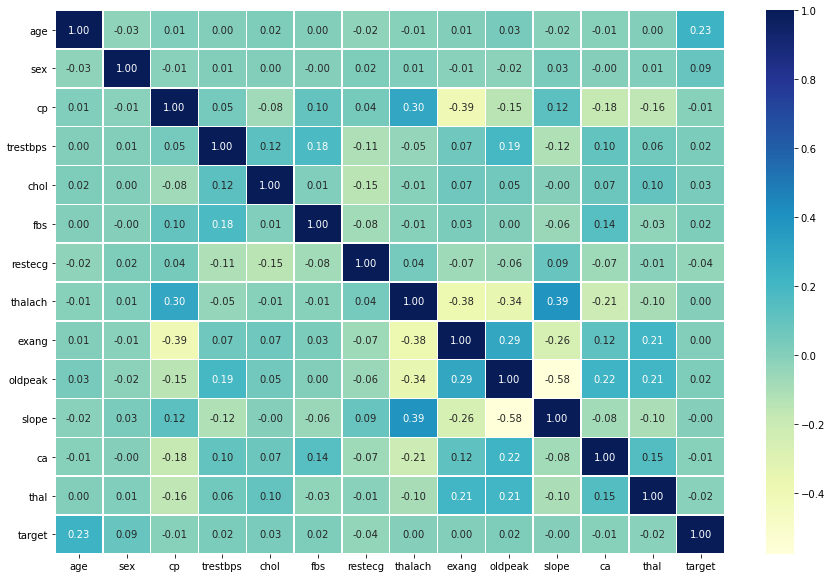

In [20]:
# Correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = ".2f",
                cmap = "YlGnBu");
bottom, top = ax.get_ylim()

## STEP-5: Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,46,0,2,130,250,0,1,187,0,3.5,0,0,2,0
2,48,1,1,130,204,0,0,172,0,1.4,2,0,2,0
3,61,0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,46,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [22]:
# Split Data into X & Y. So, 1st I drop the target coloum from the table

X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,39,1,3,145,233,1,0,150,0,2.3,0,0,1
1,46,0,2,130,250,0,1,187,0,3.5,0,0,2
2,48,1,1,130,204,0,0,172,0,1.4,2,0,2
3,61,0,1,120,236,0,1,178,0,0.8,2,0,2
4,46,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1,0,120,169,0,1,144,1,2.8,0,0,1
4234,51,1,0,140,187,0,0,144,1,4.0,2,2,3
4235,48,0,0,124,197,0,1,136,1,0.0,1,0,2
4236,44,0,0,164,176,1,0,90,0,1.0,1,2,1


In [24]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: target, Length: 4238, dtype: int64

In [25]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
3252,40,1,3,138,282,1,0,174,0,1.4,1,1,2
3946,57,0,1,120,263,0,1,173,0,0.0,2,0,3
1261,47,0,0,138,234,0,0,160,0,0.0,2,0,2
2536,41,1,2,140,313,0,1,133,0,0.2,2,0,3
4089,64,0,0,160,228,0,0,138,0,2.3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,36,0,2,150,126,1,1,173,0,0.2,2,1,3
466,57,0,2,138,175,0,1,173,0,0.0,2,4,2
3092,60,0,3,118,186,0,0,190,0,0.0,1,0,1
3772,39,1,2,120,178,1,1,96,0,0.0,2,0,2


In [27]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
3188,63,1,1,125,220,0,1,144,0,0.4,1,4,3
764,45,1,1,125,220,0,1,144,0,0.4,1,4,3
3264,51,0,0,130,322,0,0,109,0,2.4,1,3,2
1967,45,1,2,130,180,0,1,150,0,0.0,2,0,2
2185,45,0,2,140,211,1,0,165,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,47,1,0,100,234,0,1,156,0,0.1,2,1,3
4056,44,1,3,120,193,0,0,162,0,1.9,1,0,3
4210,50,1,3,134,234,0,1,145,0,2.6,1,2,2
3971,64,1,1,130,219,0,0,188,0,0.0,2,0,2


In [28]:
y_train, len(y_train)

(3252    0
 3946    0
 1261    0
 2536    0
 4089    0
        ..
 3444    0
 466     0
 3092    0
 3772    0
 860     0
 Name: target, Length: 3390, dtype: int64,
 3390)

Now We are going to try 3 Machine Learning methods:
<br /><b>1.Logistic Regressiom
<br /><b>2.K-Nearest Neighbours Classifier
<br /><b>3.Random Forest Classifier

In [29]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

C:\Users\Sayan Biswas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison

{'KNN': 0.8360849056603774,
 'Logistic Regression': 0.8525943396226415,
 'Random Forest': 0.8054245283018868}

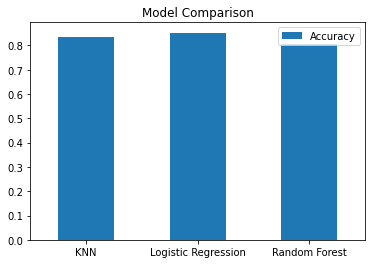

In [37]:
model_compare = pd.DataFrame(model_scores,index = ['Accuracy'])
model_compare.T.plot.bar();

plt.title("Model Comparison")
plt.xticks(rotation=0);

model_scores

## As per analysis The best algorithm for prediting heart disease is a LogisticRegrssion(85.25943396226415%)!

<b>KNN: 83.60849056603774%
Random Forest: 80.54245283018868%

Now we need do tuning as well as some activites below -

<b>Hyperparameter tuning -</b> Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
<br /><b>Feature importance -</b> If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
<br /><b>Confusion matrix -</b> Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
<br /><b>Cross-validation -</b> Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
<br /><b>Precision -</b> Proportion of true positives over total number of samples. Higher precision leads to less false positives.
<br /><b>Recall -</b> Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
<br /><b>F1 score -</b> Combines precision and recall into one metric. 1 is best, 0 is worst.
<br /><b>Classification report -</b> Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
<br /><b>ROC Curve -</b> Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
<br /><b>Area Under Curve (AUC) -</b> The area underneath the ROC curve. A perfect model achieves a score of 1.0.